### Problem

2 parallel back to back 511 KeV gammas are emitted at a point. 

These cause energy depositions in a Xenon volume, and these energy depositions in turn cause photons to be counted at sensors.

Our overall goal is to reconstruct the energy density in the Xenon volume given the photon counts on the sensor array.

If we model the photon counts as Poisson-distributed, dependent on the energy density in the simulation volume, we can do this by:

1. decomposing the xenon volume into voxels to get an energy density vector
2. using geant4 simulation data to calculate the Poisson photon count model matrix 
3. appying this model to experimental data to recover the energy density vector

#### Questions for Paola

* Can absorbed energy from an energy deposition generate a particle that is then reabsorbed somewhere else, causing *another* energy deposition? Or is energy once deposited only radiated via photons?
* I noticed maximum energy is 1. Is energy normalized to the maximum energy of the 2 511 kev gammas?

### MC simulation data

As I understand it:
1. a two_gamma event is chosen from a prior distribution; this has space coordinates and an angle
2. a geant4 simulation generates energy depositions in the xenon volume stochastically for this two_gamma event
3. a geant4 simulation generates photons stochastically for this energy density and measures the charges the photons generate in a set of sensors.

The MC simulation starts with an event where 2 parallel 511 KeV gammas originating at a point are drawn from some initial distribution. This event has coordinates in a state space of position and angle:

$$
(x, y, z, \theta, \phi) \sim prior\_gamma\_events
$$

This event stochastically generates a number of energy deposition events over time, depending on the initial gammas. These are collected in the `f['MC']['hits']` dataset, with fields: event_id, x, y, z, time, energy, label, particle_id, hit_id.

$$
depositions = (x_0, y_0, z_0, t_0, e_0), ..., (x_k, y_k, z_k, t_k, e_k)
$$

$$
depositions \sim Simulate(x, y, z, \theta, \phi)
$$

These energy depositions generate photons and the photons generate charge at the sensors, collected in the `f['MC']['waveforms']` dataset, with fields: event_id, sensor_id, time_bin, charge.

The time bin is so large it's always 0 in the dataset I've got, so we're integrating charge over time and can drop the time index. If we have $n$ sensors, the charge data is

$$
charges = charge_0, charge_1, ..., charge_n
$$

which stochastically depends on the energy depositions

$$
charges \sim Simulate\big((x_0, y_0, z_0, t_0, e_0), ..., (x_k, y_k, z_k, t_k, e_k)\big)
$$

### Initial look at the data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import load_mcs

mc = load_mcs.load_mc('full_ring_iradius165mm_depth3cm_pitch7mm_new_h5.001.pet.h5')
stats = mc.get_stats()

`stats` contains a useful summary of the hits and waveforms data:

In [2]:
print(stats)

            energy  deposition_count  charge  sensor_count
event_id                                                  
10000     0.148233                21     460           216
10001     0.510999               121    1389           233
10002     0.290297                32     832           315
10003     0.194043                61     645            81
10004     0.390317                67    1257           342
...            ...               ...     ...           ...
15399     0.510999                85    1388           202
15400     0.542531               155    1759           530
15401     0.093780                32     278           163
15402     0.355763                56     986           159
15403     0.510999               138    1229           281

[5404 rows x 4 columns]


The energy-charge relationship looks reassuringly linear with interesting artifacts at energy = 0.5 and energy = 1.0:

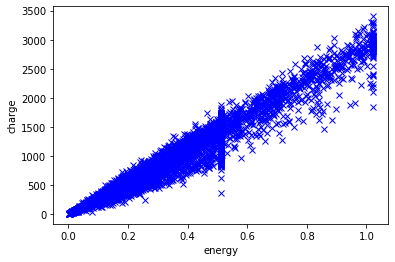

In [3]:
mc.draw_energy_vs_charge()

Histograms for the interesting quantities:

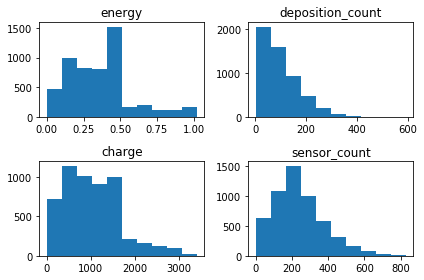

In [4]:
mc.draw_hists()

In [5]:
mc.get_xyz_bounds()

array([[-194.06573,  194.87033],
       [-194.96648,  194.7843 ],
       [ -70.     ,   70.     ]], dtype=float32)